## IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# READ DATASET


In [2]:
Train = pd.read_csv("Train (2).csv")
Test = pd.read_csv("Test (2).csv")
Sampl = pd.read_csv("SampleSubmission (2).csv")

In [3]:
Train.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,...,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,...,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,...,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,...,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,...,165,203,1,0,0,0,1,0,0,0


In [4]:
Test.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,ID_ZPMABNVX,1954,Graduation,Single,48556.8,0,1,11-01-2013,85,6,...,7,23,41,8,0,0,0,0,0,0
1,ID_WFE91NAA,1961,Graduation,Widow,57499.2,0,1,22-11-2012,79,5,...,0,0,75,6,0,1,0,0,0,0
2,ID_JV11RBRK,1973,Basic,Married,17025.6,0,0,28-02-2013,47,1,...,16,12,27,6,0,0,0,0,0,0
3,ID_6B7SVKY9,1970,Graduation,Together,91983.6,0,0,16-08-2013,98,1,...,219,189,126,2,0,0,1,1,0,0
4,ID_GOVUZ545,1959,Graduation,Together,78235.2,0,2,25-07-2013,41,2,...,12,0,200,5,1,0,0,0,0,0


In [5]:
Sampl.head()

,ID,Response
0,ID_ZPMABNVX,NaN
1,ID_WFE91NAA,NaN
2,ID_JV11RBRK,NaN
3,ID_6B7SVKY9,NaN
4,ID_GOVUZ545,NaN


# BASIC EXPLORATORY DATA ANALYSIS 

In [6]:
print(Train.shape, Test.shape, Sampl.shape)

(1568, 27) (672, 26) (672, 2)


In [7]:
target = [col for col in Train.columns if col not in Test.columns]
target

['Response']

In [8]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [9]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       672 non-null    object 
 1   Year_of_Birth            672 non-null    int64  
 2   Education_Level          672 non-null    object 
 3   Marital_Status           672 non-null    object 
 4   Disposable_Income        664 non-null    float64
 5   No_of_Kids_in_home       672 non-null    int64  
 6   No_of_Teen_in_home       672 non-null    int64  
 7   Date_Customer            672 non-null    object 
 8   Recency                  672 non-null    int64  
 9   Discounted_Purchases     672 non-null    int64  
 10  WebPurchases             672 non-null    int64  
 11  CatalogPurchases         672 non-null    int64  
 12  StorePurchases           672 non-null    int64  
 13  Amount_on_Wines          672 non-null    int64  
 14  Amount_on_Fruits         6

In [10]:
# Convert Date_Customer from the object dtype to datetime dtype in both Train and Test dataset 

Train["Date_Customer"] = pd.to_datetime(Train["Date_Customer"])
Test["Date_Customer"] = pd.to_datetime(Test["Date_Customer"])

In [11]:
# Let's check the dtypes of our datasets again
Train.dtypes, Test.dtypes

(ID                                 object
 Year_of_Birth                       int64
 Education_Level                    object
 Marital_Status                     object
 Disposable_Income                 float64
 No_of_Kids_in_home                  int64
 No_of_Teen_in_home                  int64
 Date_Customer              datetime64[ns]
 Recency                             int64
 Discounted_Purchases                int64
 WebPurchases                        int64
 CatalogPurchases                    int64
 StorePurchases                      int64
 Amount_on_Wines                     int64
 Amount_on_Fruits                    int64
 Amount_on_MeatProducts              int64
 Amount_on_FishProducts              int64
 Amount_on_SweetProducts             int64
 Amount_on_GoldProds                 int64
 WebVisitsMonth                      int64
 Cmp3Accepted                        int64
 Cmp4Accepted                        int64
 Cmp5Accepted                        int64
 Cmp1Accept

In [12]:
# Check for missing values in Train dataset
Train.isnull().sum()

ID                          0
Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
dtype: int64

In [13]:
# Then replace the missing value in Train["Disposable_Income"]
Train["Disposable_Income"].fillna((Train["Disposable_Income"].mean()),inplace = True)


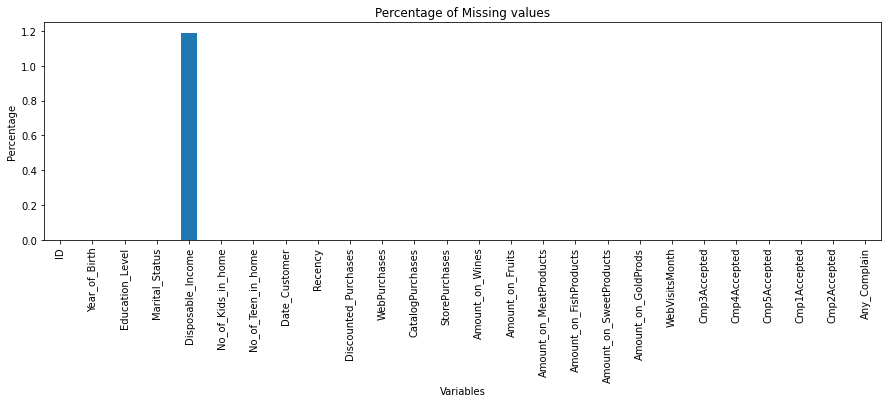

In [14]:
#Check for missing values in Test datasets
Test.isnull().sum()*100/len(Test)
# Plot the barchart of the percentage missing values
(Test.isnull().sum()*100/len(Test)).plot(kind="bar", figsize=(15,4))
plt.title("Percentage of Missing values")
plt.xlabel("Variables")
plt.ylabel("Percentage")
plt.show()

In [15]:
Test["Disposable_Income"].fillna((Test["Disposable_Income"]).mean(), inplace = True)

In [16]:
#Confirm if there are any missing values
Train.isnull().sum() ,Test.isnull().sum()

(ID                         0
 Year_of_Birth              0
 Education_Level            0
 Marital_Status             0
 Disposable_Income          0
 No_of_Kids_in_home         0
 No_of_Teen_in_home         0
 Date_Customer              0
 Recency                    0
 Discounted_Purchases       0
 WebPurchases               0
 CatalogPurchases           0
 StorePurchases             0
 Amount_on_Wines            0
 Amount_on_Fruits           0
 Amount_on_MeatProducts     0
 Amount_on_FishProducts     0
 Amount_on_SweetProducts    0
 Amount_on_GoldProds        0
 WebVisitsMonth             0
 Cmp3Accepted               0
 Cmp4Accepted               0
 Cmp5Accepted               0
 Cmp1Accepted               0
 Cmp2Accepted               0
 Any_Complain               0
 Response                   0
 dtype: int64,
 ID                         0
 Year_of_Birth              0
 Education_Level            0
 Marital_Status             0
 Disposable_Income          0
 No_of_Kids_in_home      

In [17]:
#Group the datasets in categorical and numerical features

Cat_train_feat = [feat for feat in Train.columns if Train[feat].dtype == 'O']
Cat_train_feat

['ID', 'Education_Level', 'Marital_Status']

In [18]:
Cat_test_feat = [feat for feat in Test.columns if Test[feat].dtypes == 'O']
Cat_test_feat

['ID', 'Education_Level', 'Marital_Status']

In [19]:
# Getting the numerical features

num_train_feat = [feat for feat in Train.columns if feat not in Cat_train_feat]
num_train_feat

['Year_of_Birth',
 'Disposable_Income',
 'No_of_Kids_in_home',
 'No_of_Teen_in_home',
 'Date_Customer',
 'Recency',
 'Discounted_Purchases',
 'WebPurchases',
 'CatalogPurchases',
 'StorePurchases',
 'Amount_on_Wines',
 'Amount_on_Fruits',
 'Amount_on_MeatProducts',
 'Amount_on_FishProducts',
 'Amount_on_SweetProducts',
 'Amount_on_GoldProds',
 'WebVisitsMonth',
 'Cmp3Accepted',
 'Cmp4Accepted',
 'Cmp5Accepted',
 'Cmp1Accepted',
 'Cmp2Accepted',
 'Any_Complain',
 'Response']

In [20]:
num_test_feat = [feat for feat in Test.columns if feat not in Cat_test_feat]
num_test_feat

['Year_of_Birth',
 'Disposable_Income',
 'No_of_Kids_in_home',
 'No_of_Teen_in_home',
 'Date_Customer',
 'Recency',
 'Discounted_Purchases',
 'WebPurchases',
 'CatalogPurchases',
 'StorePurchases',
 'Amount_on_Wines',
 'Amount_on_Fruits',
 'Amount_on_MeatProducts',
 'Amount_on_FishProducts',
 'Amount_on_SweetProducts',
 'Amount_on_GoldProds',
 'WebVisitsMonth',
 'Cmp3Accepted',
 'Cmp4Accepted',
 'Cmp5Accepted',
 'Cmp1Accepted',
 'Cmp2Accepted',
 'Any_Complain']

In [21]:
Train[num_train_feat]

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,1955,77504.4,1,1,2014-06-22,56,2,1,1,4,...,6,20,3,0,0,0,0,0,0,0
1,1958,56784.0,0,1,2013-01-08,17,6,5,1,8,...,15,19,6,0,0,0,0,0,0,0
2,1962,103714.8,0,0,2013-11-21,17,0,7,4,7,...,18,37,2,0,0,0,1,0,0,1
3,1979,46311.6,1,0,2013-09-13,49,3,4,1,3,...,24,24,8,0,0,0,0,0,0,0
4,1959,87486.0,0,0,2014-01-21,59,1,3,7,9,...,165,203,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,1970,52893.6,1,1,2014-06-19,24,2,2,0,3,...,0,4,5,0,0,0,0,0,0,0
1564,1980,74190.0,0,1,2013-07-08,63,1,4,2,8,...,30,27,4,0,0,0,0,0,0,0
1565,1952,80857.2,0,1,2013-01-15,74,4,2,2,9,...,0,70,7,0,1,0,0,0,0,0
1566,1964,58701.6,1,1,2014-12-04,28,2,1,0,4,...,0,1,4,0,0,0,0,0,0,0


In [22]:
Test[num_test_feat]

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,1954,48556.8,0,1,2013-11-01,85,6,8,2,8,...,7,23,41,8,0,0,0,0,0,0
1,1961,57499.2,0,1,2012-11-22,79,5,7,4,6,...,0,0,75,6,0,1,0,0,0,0
2,1973,17025.6,0,0,2013-02-28,47,1,2,0,4,...,16,12,27,6,0,0,0,0,0,0
3,1970,91983.6,0,0,2013-08-16,98,1,4,7,11,...,219,189,126,2,0,0,1,1,0,0
4,1959,78235.2,0,2,2013-07-25,41,2,7,6,11,...,12,0,200,5,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,1975,80934.0,0,1,2012-12-08,70,5,9,6,12,...,29,80,11,6,0,0,0,0,0,0
668,1955,84052.8,0,1,2013-02-18,53,4,7,10,5,...,153,14,14,5,0,0,0,0,0,0
669,1952,63974.4,0,0,2013-09-08,39,1,5,1,5,...,0,0,25,7,0,0,0,0,0,0
670,1960,69548.4,0,1,2013-08-19,31,7,4,6,8,...,77,5,29,3,0,0,0,0,0,1


In [23]:
Train[num_train_feat].shape, Test[num_test_feat].shape

((1568, 24), (672, 23))

In [24]:
#Drop "Response" in Train dataset
rem_1 = Train[num_train_feat].drop(["Response", "Year_of_Birth", "Date_Customer"], axis = 1)
rem_1

,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,77504.4,1,1,56,2,1,1,4,71,3,...,0,6,20,3,0,0,0,0,0,0
1,56784.0,0,1,17,6,5,1,8,205,22,...,50,15,19,6,0,0,0,0,0,0
2,103714.8,0,0,17,0,7,4,7,469,31,...,29,18,37,2,0,0,0,1,0,0
3,46311.6,1,0,49,3,4,1,3,56,15,...,17,24,24,8,0,0,0,0,0,0
4,87486.0,0,0,59,1,3,7,9,412,117,...,181,165,203,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,52893.6,1,1,24,2,2,0,3,29,4,...,2,0,4,5,0,0,0,0,0,0
1564,74190.0,0,1,63,1,4,2,8,167,53,...,55,30,27,4,0,0,0,0,0,0
1565,80857.2,0,1,74,4,2,2,9,820,11,...,11,0,70,7,0,1,0,0,0,0
1566,58701.6,1,1,28,2,1,0,4,57,3,...,0,0,1,4,0,0,0,0,0,0


In [25]:
rem_2 = Test[num_test_feat].drop(["Year_of_Birth", "Date_Customer"], axis = 1)
rem_2

,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,48556.8,0,1,85,6,8,2,8,429,20,...,7,23,41,8,0,0,0,0,0,0
1,57499.2,0,1,79,5,7,4,6,510,3,...,0,0,75,6,0,1,0,0,0,0
2,17025.6,0,0,47,1,2,0,4,7,10,...,16,12,27,6,0,0,0,0,0,0
3,91983.6,0,0,98,1,4,7,11,741,66,...,219,189,126,2,0,0,1,1,0,0
4,78235.2,0,2,41,2,7,6,11,748,22,...,12,0,200,5,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,80934.0,0,1,70,5,9,6,12,762,83,...,29,80,11,6,0,0,0,0,0,0
668,84052.8,0,1,53,4,7,10,5,1078,3,...,153,14,14,5,0,0,0,0,0,0
669,63974.4,0,0,39,1,5,1,5,246,3,...,0,0,25,7,0,0,0,0,0,0
670,69548.4,0,1,31,7,4,6,8,295,62,...,77,5,29,3,0,0,0,0,0,1


In [26]:
rem_1.shape , rem_2.shape

((1568, 21), (672, 21))

# BUILDING THE BASE MODEL

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(rem_1, Train.Response, test_size = 0.30, random_state =42 )

In [28]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [29]:
linear_model_Pred_1 = linear_model.predict(X_test)
linear_model_Pred_1



array([-6.43961333e-02,  2.96035270e-01,  1.69970425e-02,  3.88143022e-01,
        1.03867719e-01,  1.13063444e-01, -2.32804678e-02,  1.86333883e-02,
        7.37977414e-01,  1.40436912e-01,  2.06771846e-01, -8.76685609e-02,
        1.44175859e-02,  2.33795482e-01,  7.32743072e-01,  1.45516840e-01,
       -7.57575408e-02,  1.35162797e-01,  5.79429817e-03, -6.30868598e-02,
        2.58372427e-01,  3.40486901e-02,  3.57075426e-01,  1.86358389e-01,
        4.71432873e-01,  3.49649494e-01,  1.93858489e-01,  1.28786162e-01,
        5.45447379e-01,  1.37370398e-01,  5.80097949e-02,  1.01731383e-01,
        1.03522837e-01,  2.33795482e-01,  5.64493434e-02,  1.37227261e-01,
        2.21609345e-01,  2.89790513e-01,  4.32257808e-01, -2.58680264e-02,
       -9.06302758e-02,  2.44485828e-01, -7.05808526e-02,  1.65085375e-01,
        1.17265311e-01,  3.02425409e-02, -5.76153500e-02, -9.39493052e-02,
       -1.12519284e-01, -1.77622923e-02,  1.84850830e-01,  6.17127458e-03,
        2.38647456e-01,  

In [30]:
#To avoid overfitting or underfitting our model, let also predict on y_train
linear_model_Pred_2 = linear_model.predict(X_train)
linear_model_Pred_2

array([ 0.10037221, -0.06651058, -0.08096035, ...,  0.14398507,
        0.14959875,  0.05117989])

# MODEL EVALAUTION

In [32]:
from sklearn.metrics import mean_squared_error
MSE_1 = mean_squared_error(y_test, linear_model_Pred_1)
MSE_1

0.08736467108023192

In [33]:
MSE_2 = mean_squared_error(y_train, linear_model_Pred_2)
MSE_2

0.09064731626286412

In [34]:
print("Testing Evaluation")
print("The Mean Square Error of our testing evalaution is {}".format(MSE_1))

Testing Evalaution
The Mean Square Error of our testing evalaution is 0.08736467108023192


In [36]:
print("Training Evaluation")
print("The Mean Square Error of our testing evaluation is {} %".format((MSE_2*100).round(2)))

Training Evalaution
The Mean Square Error of our testing evaluation is 9.06 %
